In [2]:
import tensorflow as tf
import numpy as np

### tensorflow 的运行方式分为4步：
#### 加载数据及定义超参数
#### 构建网络
#### 训练模型
#### 评估模型和进行预测


#### 1.生成服从等差数列的x数据，增加噪声点，得到y值

In [89]:
x_data  = np.linspace(-1,1,300)[:,np.newaxis]
print(x_data.shape)
#生成随机噪声,均值为0，方差为0.05的正态分布
noise = np.random.normal(0,0.05,x_data.shape)
#y = x^6+0.5
y_data = np.power(x_data,6) + 0.5 + noise

(300, 1)


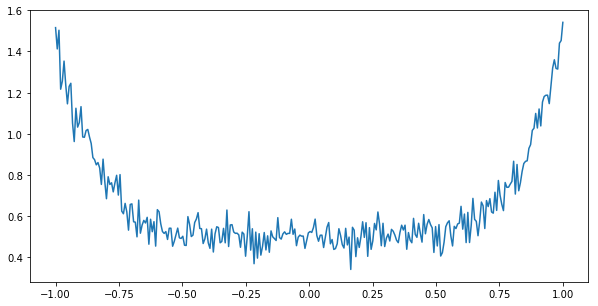

In [104]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(x_data,y_data)
plt.show()

### 用一个两层的神经网络拟合上面产生的数据

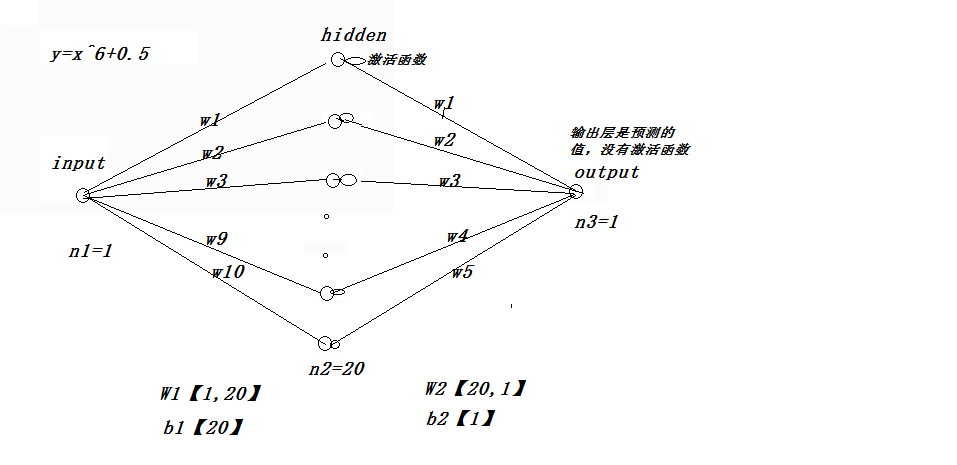

In [91]:
from IPython.display import Image
Image('第一个神经网络.png')

#### 2.定义占位符，作为将要输入神经网络的变量

In [92]:
xs = tf.placeholder(tf.float32,[None,1])
ys = tf.placeholder(tf.float32,[None,1])

#### 3.需要构建一个隐藏层和一个输出层。作为神经网络中的层，输入参数应该会有四个参数：输入数据、输入数据的维度、输出数据的维度、和激活函数。每一层经过向量化的处理，并经过激活函数的非线性处理后，最终得到输出数据。

In [93]:
def add_layers(input_data,in_size,out_size,active_function=None):
    print(input_data,'\n',in_size,out_size,active_function)
    #构造权重矩阵，形状为：in_size * out_size
    weights = tf.Variable(tf.random_normal([in_size,out_size]))
    #构建偏置，1*out_size矩阵
    biases = tf.Variable(tf.zeros([1,out_size])+0.1)
    print(biases.shape)
    #矩阵相乘
    Wx_plus_b = tf.matmul(input_data,weights) + biases
    print('wx_plus_b:',Wx_plus_b.shape)
    if active_function is None:
        outputs = Wx_plus_b
    else:
        outputs = active_function(Wx_plus_b)
    print(outputs.shape)
    return outputs

#### 4.构建隐藏层，有20个神经元

In [94]:
h1 = add_layers(xs,1,20,active_function=tf.nn.relu)

Tensor("Placeholder_10:0", shape=(?, 1), dtype=float32) 
 1 20 <function relu at 0x00000000076CF0D0>
(1, 20)
wx_plus_b: (?, 20)
(?, 20)


#### 5.构建输出层，同输入层一样有1个神经元

In [95]:
prediction = add_layers(h1,20,1,active_function=None)

Tensor("Relu_4:0", shape=(?, 20), dtype=float32) 
 20 1 None
(1, 1)
wx_plus_b: (?, 1)
(?, 1)


#### 6.计算损失值，计算MSE均方差

In [96]:
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys-prediction),reduction_indices=[1]))

#### 7.使用梯度下降优化器，最小化SSE误差平方差

In [97]:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

#### 8.初始化Graph中的变量

In [98]:
init = tf.global_variables_initializer()

#### 9.构建Session

In [99]:
sess = tf.Session()

#### 10.正式初始化

In [100]:
sess.run(init)

#### 11.迭代200次，每10次打印出损失值

In [101]:
for i in range(200):
    sess.run(train_step,feed_dict={xs:x_data,ys:y_data})
    if(i % 10 == 0):
        print('loss:%s'%(sess.run(loss,feed_dict={xs:x_data,ys:y_data})))

loss:0.0421755
loss:0.0234933
loss:0.0209263
loss:0.0198546
loss:0.0191163
loss:0.0185644
loss:0.0181387
loss:0.0178034
loss:0.0175313
loss:0.0173
loss:0.0171024
loss:0.0169288
loss:0.0167708
loss:0.0166258
loss:0.0164914
loss:0.0163627
loss:0.0162352
loss:0.0161135
loss:0.0159978
loss:0.0158906


In [59]:
x_data.shape

(300, 1)

In [60]:
y_data.shape

(300, 1)